<a href="https://colab.research.google.com/github/JuannMontoya/colab_signals_and_systems/blob/main/UNIDADES_D_UTP/ACTIVIDAD_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

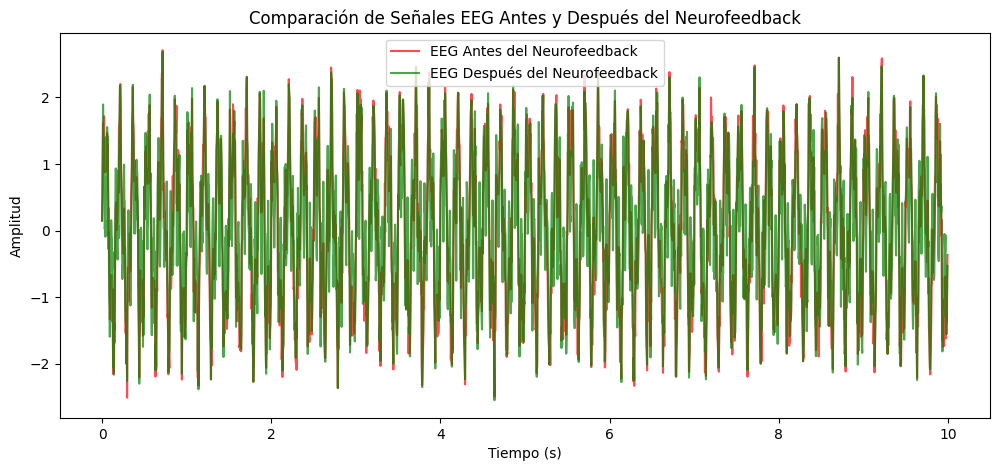

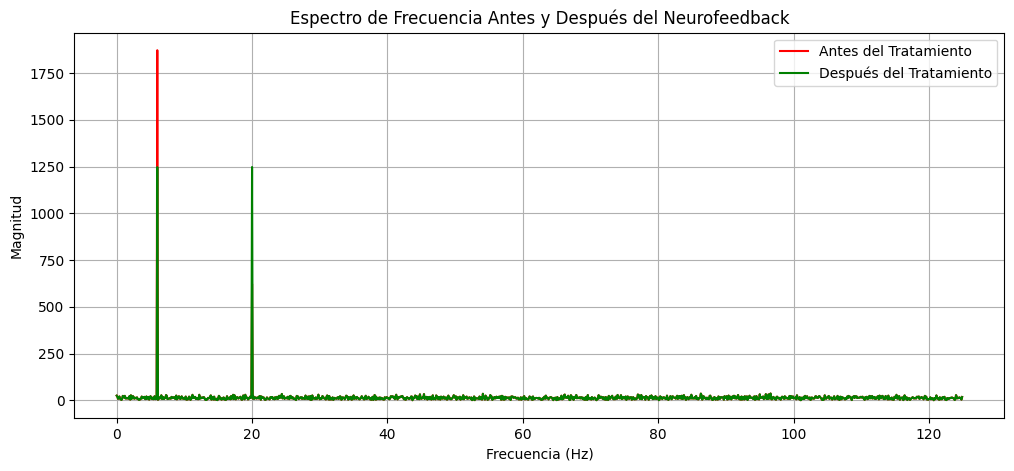

Relación Theta/Beta antes del tratamiento: 3.56
Relación Theta/Beta después del tratamiento: 2.17
El neurofeedback ha reducido la relación Theta/Beta, indicando una posible mejora en el control cognitivo.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parámetros de la señal EEG
fs = 250  # Frecuencia de muestreo en Hz
t = np.arange(0, 10, 1/fs)  # Vector de tiempo de 10 segundos

# Simulación de señales EEG antes del tratamiento (mayor Theta, menor Beta)
np.random.seed(42)
theta_before = 1.5 * np.sin(2 * np.pi * 6 * t)  # Onda Theta (6 Hz) más intensa
beta_before = 0.5 * np.sin(2 * np.pi * 20 * t)  # Onda Beta (20 Hz) menos intensa
noise = 0.3 * np.random.randn(len(t))  # Ruido aleatorio

# Señal EEG antes del tratamiento
eeg_before = theta_before + beta_before + noise

# Simulación de señales EEG después del tratamiento (reducción Theta, aumento Beta)
theta_after = 1.0 * np.sin(2 * np.pi * 6 * t)  # Onda Theta reducida
beta_after = 1.0 * np.sin(2 * np.pi * 20 * t)  # Onda Beta aumentada

# Señal EEG después del tratamiento
eeg_after = theta_after + beta_after + noise

# Visualización de las señales antes y después del tratamiento
plt.figure(figsize=(12,5))
plt.plot(t, eeg_before, label="EEG Antes del Neurofeedback", color='red', alpha=0.7)
plt.plot(t, eeg_after, label="EEG Después del Neurofeedback", color='green', alpha=0.7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Comparación de Señales EEG Antes y Después del Neurofeedback")
plt.legend()
plt.show()

# Aplicación de la Transformada de Fourier
fft_before = np.fft.fft(eeg_before)
fft_after = np.fft.fft(eeg_after)
freqs = np.fft.fftfreq(len(t), d=1/fs)

# Visualización del espectro de frecuencia antes y después del tratamiento
plt.figure(figsize=(12,5))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_before[:len(freqs)//2]), label="Antes del Tratamiento", color='red')
plt.plot(freqs[:len(freqs)//2], np.abs(fft_after[:len(freqs)//2]), label="Después del Tratamiento", color='green')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro de Frecuencia Antes y Después del Neurofeedback")
plt.legend()
plt.grid()
plt.show()

# Cálculo de la relación Theta/Beta antes y después del tratamiento
theta_band_before = np.mean(np.abs(fft_before[(freqs >= 4) & (freqs <= 8)]))
beta_band_before = np.mean(np.abs(fft_before[(freqs >= 12) & (freqs <= 30)]))
theta_beta_ratio_before = theta_band_before / beta_band_before

theta_band_after = np.mean(np.abs(fft_after[(freqs >= 4) & (freqs <= 8)]))
beta_band_after = np.mean(np.abs(fft_after[(freqs >= 12) & (freqs <= 30)]))
theta_beta_ratio_after = theta_band_after / beta_band_after

print(f"Relación Theta/Beta antes del tratamiento: {theta_beta_ratio_before:.2f}")
print(f"Relación Theta/Beta después del tratamiento: {theta_beta_ratio_after:.2f}")

# Evaluación de la reducción en la relación Theta/Beta
if theta_beta_ratio_after < theta_beta_ratio_before:
    print("El neurofeedback ha reducido la relación Theta/Beta, indicando una posible mejora en el control cognitivo.")
else:
    print("No se observa una reducción significativa en la relación Theta/Beta, por lo que se requieren más estudios.")